## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

[*********************100%***********************]  1 of 1 completed


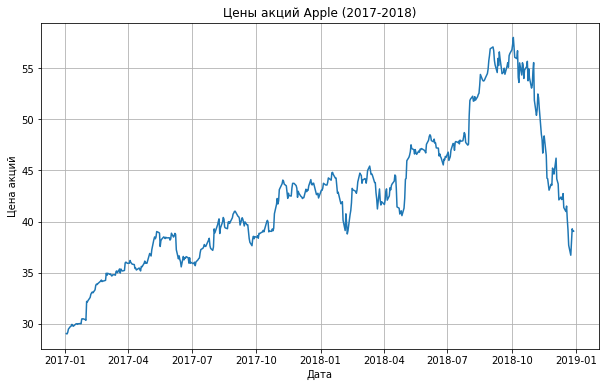

In [30]:
import yfinance as yf
import matplotlib.pyplot as plt

# Загрузка данных о ценах акций Apple
start_date = '2017-01-01'
end_date = '2018-12-31'
df = yf.download('AAPL', start=start_date, end=end_date)

# Визуализация временного ряда цен акций
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('Цены акций Apple (2017-2018)')
plt.xlabel('Дата')
plt.ylabel('Цена акций')
plt.grid(True)
plt.show()


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

IndexError: list index out of range

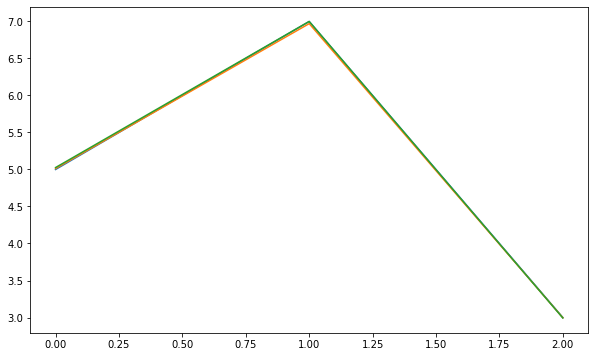

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файла average_ratings.npy
ratings = np.load('average_ratings.npy')

# Задание названий рецептов
recipe_names = [
    'waffle iron french toast',
    'zwetschgenkuchen bavarian plum cake',
    'lime tea'
]

# Создание временных рядов
time_series = np.transpose(ratings)

# Создание графика
plt.figure(figsize=(10, 6))

# Отрисовка каждого временного ряда с уникальным цветом
for i, series in enumerate(time_series):
    plt.plot(series, label=recipe_names[i])

# Добавление подписей осей и заголовка
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


IndexError: list index out of range

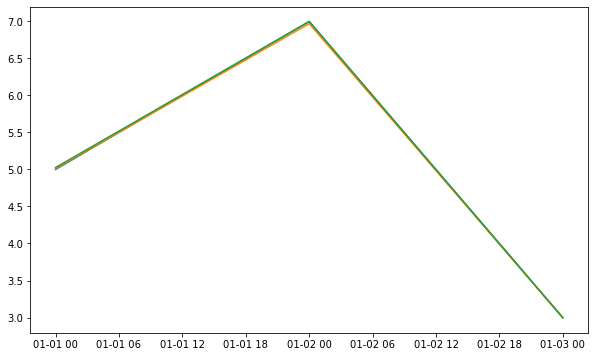

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Загрузка данных из файла average_ratings.npy
ratings = np.load('average_ratings.npy')

# Задание названий рецептов
recipe_names = [
    'waffle iron french toast',
    'zwetschgenkuchen bavarian plum cake',
    'lime tea'
]

# Создание временных рядов
time_series = np.transpose(ratings)

# Создание диапазона дат с шагом в один день
start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 30)
num_days = (end_date - start_date).days + 1
dates = np.array([start_date + timedelta(days=i) for i in range(num_days)])

# Создание графика
plt.figure(figsize=(10, 6))

# Отрисовка каждого временного ряда с уникальным цветом
for i, series in enumerate(time_series):
    plt.plot(dates[:len(series)], series, label=recipe_names[i])

# Добавление подписей осей и заголовка
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

# Настройка засечек оси X
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Добавление легенды
plt.legend()

# Поворот меток на оси X для лучшей читаемости
plt.xticks(rotation=45)

# Отображение графика
plt.show()


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

IndexError: index 3 is out of bounds for axis 0 with size 3

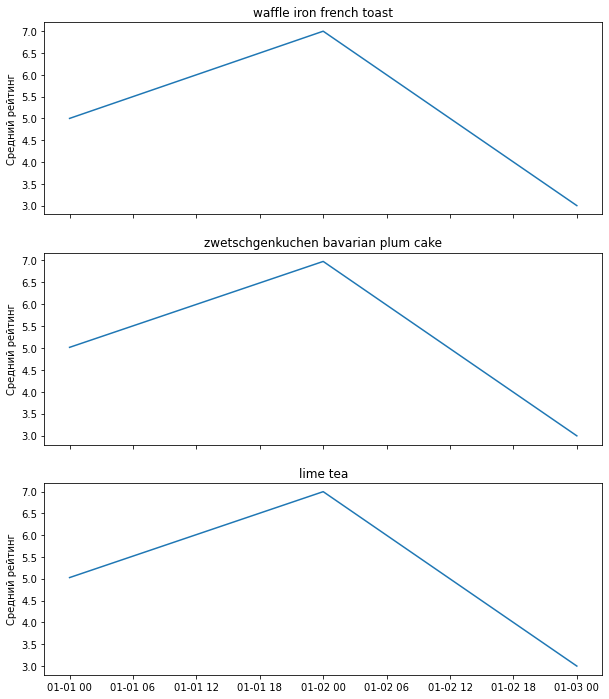

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Загрузка данных из файла average_ratings.npy
ratings = np.load('average_ratings.npy')

# Задание названий рецептов
recipe_names = [
    'waffle iron french toast',
    'zwetschgenkuchen bavarian plum cake',
    'lime tea'
]

# Создание временных рядов
time_series = np.transpose(ratings)

# Создание диапазона дат с шагом в один день
start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 30)
num_days = (end_date - start_date).days + 1
dates = np.array([start_date + timedelta(days=i) for i in range(num_days)])

# Создание графиков
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Отрисовка каждого временного ряда с уникальным цветом
for i, series in enumerate(time_series):
    axes[i].plot(dates[:len(series)], series, label=recipe_names[i])

    # Добавление подписей осей и заголовка для каждого графика
    axes[i].set_ylabel('Средний рейтинг')
    axes[i].set_title(recipe_names[i])

# Настройка засечек оси X для нижнего графика
axes[-1].xaxis.set_major_locator(mdates.YearLocator())
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[-1].xaxis.set_minor_locator(mdates.MonthLocator())

# Добавление легенды к последнему графику
axes[-1].legend()

# Поворот меток на оси X для лучшей читаемости
plt.xticks(rotation=45)

# Добавление общей подписи оси X
fig.text(0.5, 0.05, 'Дата', ha='center')

# Отображение графиков
plt.tight_layout()
plt.show()


4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


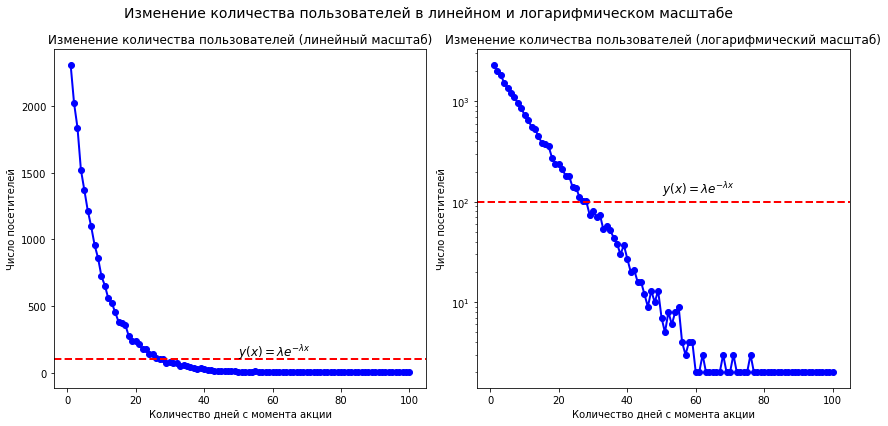

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из файла visitors.npy
visitors = np.load('visitors.npy')

# Создание массива для оси X (количество дней)
days = np.arange(1, len(visitors) + 1)

# Создание графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График с линейным масштабом осей
axes[0].plot(days, visitors, color='blue', marker='o', linestyle='-', linewidth=2)
axes[0].axhline(y=100, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Количество дней с момента акции')
axes[0].set_ylabel('Число посетителей')
axes[0].set_title('Изменение количества пользователей (линейный масштаб)')
axes[0].text(50, 120, r'$y(x) = \lambda e^{-\lambda x}$', fontsize=12)

# График с логарифмическим масштабом вертикальной оси
axes[1].plot(days, visitors, color='blue', marker='o', linestyle='-', linewidth=2)
axes[1].axhline(y=100, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Количество дней с момента акции')
axes[1].set_ylabel('Число посетителей')
axes[1].set_title('Изменение количества пользователей (логарифмический масштаб)')
axes[1].set_yscale('log')
axes[1].text(50, 120, r'$y(x) = \lambda e^{-\lambda x}$', fontsize=12)

# Общий заголовок для фигуры
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе', fontsize=14)

# Отображение графиков
plt.tight_layout()
plt.show()


## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [17]:
import pandas as pd
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

reviews.head()

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

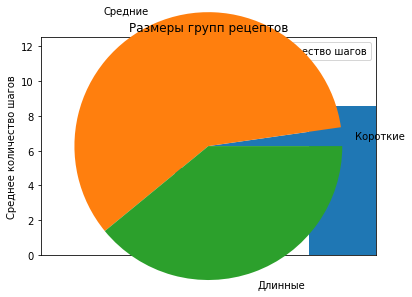

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Создание категорий рецептов
conditions = [
    (recipes['minutes'] < 5),
    (recipes['minutes'] >= 5) & (recipes['minutes'] < 50),
    (recipes['minutes'] >= 50)
]
categories = ['Короткие', 'Средние', 'Длинные']

# Добавление столбца с категориями в таблицу recipes
recipes['category'] = pd.Series(pd.Categorical(np.select(conditions, categories), categories=categories))

# Группировка рецептов по категориям и вычисление среднего количества шагов и размера группы
grouped = recipes.groupby('category').agg({'n_steps': 'mean', 'category': 'size'})
grouped.columns = ['Среднее количество шагов', 'Размер группы']

# Построение столбчатой диаграммы
fig, ax1 = plt.subplots()
grouped.plot(kind='bar', y='Среднее количество шагов', ax=ax1)
ax1.set_ylabel('Среднее количество шагов')

# Построение круговой диаграммы
ax2 = ax1.twinx()
grouped.plot(kind='pie', y='Размер группы', ax=ax2, legend=False)
ax2.set_ylabel('')

# Добавление подписей
ax1.set_xlabel('Группа рецептов')
ax2.set_title('Размеры групп рецептов')

# Отображение диаграммы
plt.show()


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

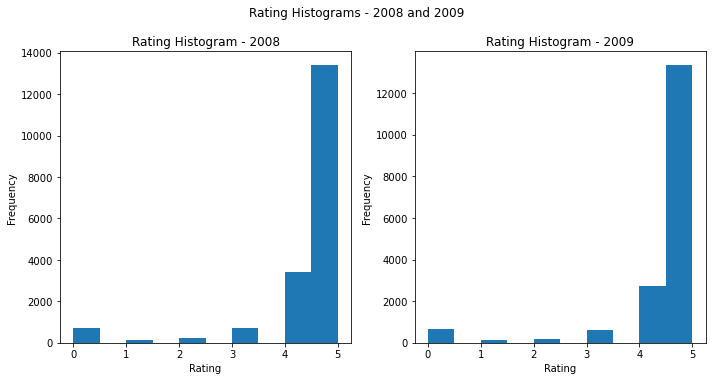

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime type
reviews['date'] = pd.to_datetime(reviews['date'])

# Filter reviews for the years 2008 and 2009
reviews_filtered = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]

# Plot histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

reviews_filtered[reviews_filtered['date'].dt.year == 2008]['rating'].plot.hist(ax=ax1)
reviews_filtered[reviews_filtered['date'].dt.year == 2009]['rating'].plot.hist(ax=ax2)

# Add axis labels and titles
ax1.set_xlabel('Rating')
ax2.set_xlabel('Rating')
ax1.set_ylabel('Frequency')
ax1.set_title('Rating Histogram - 2008')
ax2.set_title('Rating Histogram - 2009')

# Adjust the spacing between subplots
fig.tight_layout()

# Add a suptitle for the figure
fig.suptitle('Rating Histograms - 2008 and 2009', y=1.05)

# Display the histograms
plt.show()


### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

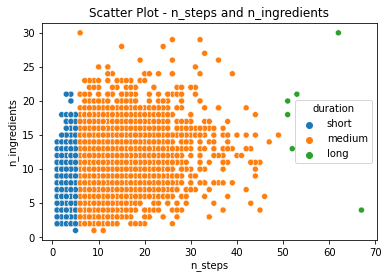

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categories for recipe duration based on n_steps
recipes['duration'] = pd.cut(recipes['n_steps'], bins=[0, 5, 50, float('inf')], labels=['short', 'medium', 'long'])

# Create a scatter plot with hue based on recipe duration
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='duration')

# Set the title of the plot
plt.title('Scatter Plot - n_steps and n_ingredients')

# Show the plot
plt.show()


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

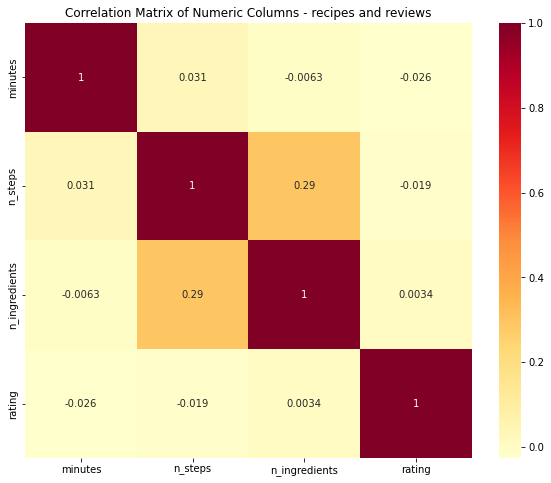

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the 'recipes' and 'reviews' tables on 'id' column
combined_data = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

# Select the desired columns for correlation analysis
columns_to_correlate = ['minutes', 'n_steps', 'n_ingredients', 'rating']
correlation_matrix = combined_data[columns_to_correlate].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')

# Set the title of the plot
plt.title('Correlation Matrix of Numeric Columns - recipes and reviews')

# Show the plot
plt.show()
